# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import the data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)

loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col=0)

ref_catefories = pd.read_csv('ref_categorie.csv', index_col=0)

In [3]:
loan_data_inputs_train.shape, loan_data_targets_train.shape, loan_data_inputs_test.shape, loan_data_targets_test.shape, ref_catefories.shape

((1808534, 132), (1808534, 1), (452134, 132), (452134, 1), (22, 1))

Selecting the Features

In [4]:
ref_catefories = list(ref_catefories.iloc[:, 0])

In [5]:
inputs_train = loan_data_inputs_train.drop(ref_catefories, axis=1)
targets_train = loan_data_targets_train.copy()

inputs_test = loan_data_inputs_test.drop(ref_catefories, axis=1)
targets_test = loan_data_targets_test.copy()

# PD Model Estimation

Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
reg = LogisticRegression()

In [8]:
pd.options.display.max_rows = None

In [9]:
reg.fit(inputs_train, targets_train)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
reg.intercept_

array([0.09194716])

In [11]:
reg.coef_

array([[ 1.58949276e+00,  1.16918748e+00,  8.87814914e-01,
         6.55985096e-01,  4.00166791e-01,  2.42113195e-01,
        -9.27660486e-02,  2.49784392e-02,  1.59845948e-01,
        -2.70039519e-01, -1.80618260e-01, -1.28021892e-01,
        -9.20072299e-02, -8.03131681e-02,  4.04617931e-02,
         7.90379866e-02,  1.20015306e-01,  1.59878035e-01,
         2.81051516e-01,  2.60858920e-01,  6.12743967e-01,
        -1.45836765e-01, -1.71579063e-01, -1.65077917e-01,
        -1.09063525e-01, -1.09339980e-01,  2.25785068e-01,
         6.26760044e-02,  9.73621794e-02,  1.80311317e-01,
         9.59023943e-02,  1.27447963e-01,  3.22753837e-01,
         1.91958557e-02,  1.62094413e-01,  1.17229230e-01,
         1.48164947e-01,  1.24164064e-01,  1.75400907e-01,
         3.40952354e+00,  1.87774980e+00,  1.04602301e+00,
         7.44967164e-01,  4.97228539e-01,  2.38169472e-01,
         5.42865443e-02, -1.91771308e-01, -4.54161534e-01,
        -3.79988775e-01, -1.54406955e-01, -3.22552426e-0

# Build a Logistic Regression Model with P-Values

In [12]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)

        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)

        # Use a regularizer with a penalty of l2.
        Cramer_Rao = np.linalg.inv(F_ij + np.eye(X.shape[1]) * 0.01)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [13]:
reg = LogisticRegression_with_p_values()

In [14]:
reg.fit(inputs_train, targets_train)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Summary table

In [15]:
features_name = inputs_train.columns.values

summary_table = pd.DataFrame(data=features_name, columns=['Features Name'])
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

p_values = np.append(np.nan, np.array(reg.p_values))
summary_table['P-values'] = p_values

In [16]:
summary_table.head()

,Features Name,Coefficient,P-values
0,Intercept,0.091947,NaN
1,grade:A,1.589493,0.000000e+00
2,grade:B,1.169187,0.000000e+00
3,grade:C,0.887815,1.176063e-223
4,grade:D,0.655985,3.745894e-135


In [129]:
# summary_table.to_csv('PD Model 1.csv')

Removing the features with low statistical segnigicance (P-Values)

In [18]:
low_ss_features0 = ['delinq_2yrs', 'open_acc', 'pub_rec', 'total_rev_hi_lim', 'total_acc']
low_ss_features1 = ['addr_state', 'dti', 'delinq_2yrs', 'pub_rec', 'total_acc', 'mths_since_last_record']
low_ss_features2 = ['home_ownership', 'addr_state', 'dti', 'delinq_2yrs', 'pub_rec', 'total_acc', 'mths_since_last_record']

In [19]:
def RemoveDummies(df, ref_cat_list_Original, cat_to_remove):

    ref_cat_list = ref_cat_list_Original.copy()
    dummies_to_remove = []

    for cat in cat_to_remove:
        for dummie in df.columns.values:
            if cat in dummie:
                dummies_to_remove.append(dummy)
    
        for dummie in ref_cat_list:
            if cat in dummie:
                ref_cat_list.remove(dummy)

    return df.drop(dummies_to_remove, axis=1), ref_cat_list

In [20]:
inputs_train.shape

(1808534, 110)

In [21]:
inputs_train, ref_catefories = RemoveDummies(inputs_train, ref_catefories, low_ss_features2)

In [22]:
inputs_train.shape

(1808534, 65)

The second regresion

In [23]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, targets_train)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Summary table 2

In [24]:
features_name = inputs_train.columns.values

summary_table = pd.DataFrame(data=features_name, columns=['Features Name'])
summary_table['Coefficient'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

p_values = np.append(np.nan, np.array(reg2.p_values))
summary_table['P-values'] = p_values

In [25]:
summary_table.head()

,Features Name,Coefficient,P-values
0,Intercept,-0.076301,NaN
1,grade:A,1.613924,0.000000e+00
2,grade:B,1.174069,0.000000e+00
3,grade:C,0.871421,4.717304e-218
4,grade:D,0.623807,2.674831e-124


# PD Model Validatin (Test)

Out-of-sample validation (test)

In [26]:
inputs_test, _ = RemoveDummies(inputs_test, ref_catefories, low_ss_features2)

In [27]:
y_hat_test = reg2.model.predict(inputs_test)

In [28]:
inputs_test.shape[0], inputs_test.shape[0] - y_hat_test.sum()

(452134, 550)

In [29]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [30]:
y_hat_test_proba

array([[0.12843785, 0.87156215],
       [0.15269596, 0.84730404],
       [0.04763808, 0.95236192],
       ...,
       [0.03175119, 0.96824881],
       [0.08171456, 0.91828544],
       [0.17249582, 0.82750418]])

Extract the positive probabilities

In [31]:
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [32]:
y_hat_test_proba

array([0.87156215, 0.84730404, 0.95236192, ..., 0.96824881, 0.91828544,
       0.82750418])

In [33]:
targets_test_temp = targets_test
targets_test_temp.reset_index(drop=True, inplace=True)

In [34]:
df_actual_predicted_probs = pd.concat([targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

df_actual_predicted_probs.index = inputs_test.index

In [35]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
1758049,1,0.871562
686533,1,0.847304
900721,1,0.952362
1727912,1,0.698061
539691,1,0.946371


Accuracy and Area under the Curve 

In [36]:
tr = 0.7
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [37]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
1758049,1,0.871562,1
686533,1,0.847304,1
900721,1,0.952362,1
1727912,1,0.698061,0
539691,1,0.946371,1


In [38]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,10955,46110
1,19833,375236


In [39]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.024230,0.101983
1,0.043865,0.829922


In [40]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,10955,46110
1,19833,375236


In [41]:
print(metrics.classification_report(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test']))

              precision    recall  f1-score   support

           0       0.36      0.19      0.25     57065
           1       0.89      0.95      0.92    395069

    accuracy                           0.85    452134
   macro avg       0.62      0.57      0.58    452134
weighted avg       0.82      0.85      0.83    452134



AUROC = area under the ROC

In [42]:
metrics.roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99998248, 0.99998248,
        1.        ]),
 array([0.00000000e+00, 2.53120341e-06, 8.35297125e-05, ...,
        9.99997469e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99936682, 0.99925136, ..., 0.40883801, 0.39052576,
        0.37761349]))

In [43]:
# fpr = false positive rate
# tpr = true positive rate 
fpr, tpr, threshold = metrics.roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

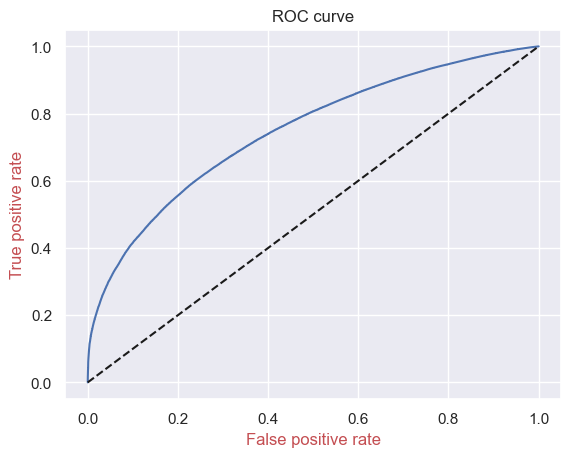

In [44]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate', color = 'r')
plt.ylabel('True positive rate', color = 'r')
plt.title('ROC curve')

In [45]:
AUROC = metrics.roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                              df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7469909285513275

Gini and Kolmogorov-Smirnov

In [46]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [47]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
800593,0,0.377613,0
629175,1,0.390526,0
1969823,0,0.408838,0
966925,1,0.409254,0
1880440,0,0.409296,0


In [48]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
125493,1,0.999346,1
58252,1,0.999351,1
127541,1,0.999354,1
38975,1,0.999356,1
29110,1,0.999367,1


In [49]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [50]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,800593,0,0.377613,0
1,629175,1,0.390526,0
2,1969823,0,0.408838,0
3,966925,1,0.409254,0
4,1880440,0,0.409296,0


In [51]:
df_actual_predicted_probs['Cumulative N Poputaion'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] =  df_actual_predicted_probs['Cumulative N Poputaion'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [52]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Poputaion,Cumulative N Good,Cumulative N Bad
0,800593,0,0.377613,0,1,0,1
1,629175,1,0.390526,0,2,1,1
2,1969823,0,0.408838,0,3,1,2
3,966925,1,0.409254,0,4,2,2
4,1880440,0,0.409296,0,5,2,3


In [53]:
df_actual_predicted_probs['Cumulative % Poputaion'] =  df_actual_predicted_probs['Cumulative N Poputaion'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative % Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative % Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())


In [54]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Poputaion,Cumulative N Good,Cumulative N Bad,Cumulative % Poputaion,Cumulative % Good,Cumulative % Bad
0,800593,0,0.377613,0,1,0,1,0.000002,0.000000,0.000018
1,629175,1,0.390526,0,2,1,1,0.000004,0.000003,0.000018
2,1969823,0,0.408838,0,3,1,2,0.000007,0.000003,0.000035
3,966925,1,0.409254,0,4,2,2,0.000009,0.000005,0.000035
4,1880440,0,0.409296,0,5,2,3,0.000011,0.000005,0.000053


Gini

Text(0.5, 1.0, 'Gini')

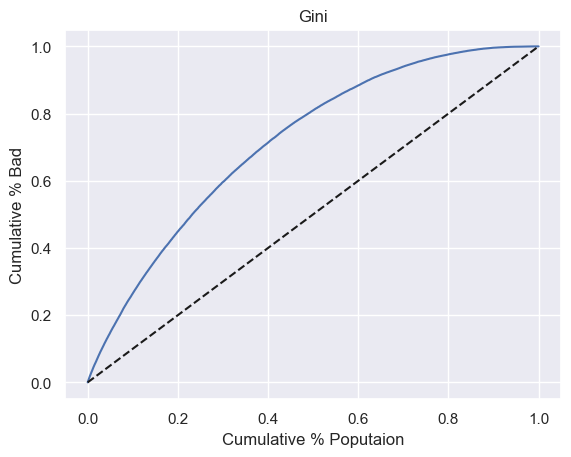

In [55]:
plt.plot(df_actual_predicted_probs['Cumulative % Poputaion'], df_actual_predicted_probs['Cumulative % Bad'])
plt.plot(df_actual_predicted_probs['Cumulative % Poputaion'], df_actual_predicted_probs['Cumulative % Poputaion'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Poputaion')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [56]:
Gini = AUROC*2 - 1
Gini

0.4939818571026551

Kolmogorov-Smirnov

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

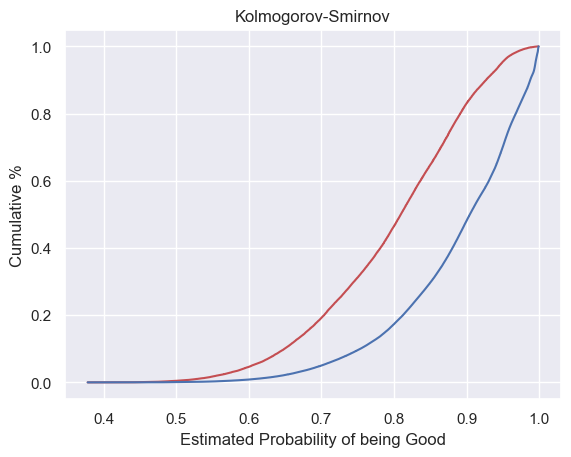

In [57]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative % Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative % Good'], color = 'b')
plt.xlabel('Estimated Probability of being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [58]:
KS = max(df_actual_predicted_probs['Cumulative % Bad'] - df_actual_predicted_probs['Cumulative % Good'])
KS

0.3617009904883269

# Applying the PD Model

Caululating PD of individual accounts

In [59]:
pd.options.display.max_columns = None

In [60]:
ref_catefories

['grade:G',
 'verification_status:Verified',
 'purpose:educational__small_business__renewable_energy__moving',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:0',
 'mths_since_issue_date:>136',
 'int_rate:>22.772',
 'mths_since_earliest_cr_line:>538',
 'annual_inc:185k-200k',
 'mths_since_last_delinq:Missing',
 'inq_last_6mths:>5.28',
 'open_acc:>32',
 'total_rev_hi_lim:>200k',
 'acc_now_delinq:>0.07']

In [61]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_date:<40,mths_since_issue_date:40-43,mths_since_issue_date:44-45,mths_since_issue_date:46-48,mths_since_issue_date:47-51,mths_since_issue_date:52-55,mths_since_issue_date:55-59,mths_since_issue_date:60-65,mths_since_issue_date:66-76,mths_since_issue_date:77-96,mths_since_issue_date:97-113,mths_since_issue_date:114-135,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.068,int_rate:15.068-22.772,mths_since_earliest_cr_line:<22,mths_since_earliest_cr_line:22-41,mths_since_earliest_cr_line:42-62,mths_since_earliest_cr_line:63-144,mths_since_earliest_cr_line:145-310,mths_since_earliest_cr_line:311-537,annual_inc:<=5k,annual_inc:5k-10k,annual_inc:10k-30k,annual_inc:30k-45k,annual_inc:45k-65k,annual_inc:65k-85k,annual_inc:85k-100k,annual_inc:100k-125k,annual_inc:125k-160k,annual_inc:160k-185k,annual_inc:>200k,mths_since_last_delinq:0-4,mths_since_last_delinq:5-19,mths_since_last_delinq:20-85,mths_since_last_delinq:>86,inq_last_6mths:<=1.32,inq_last_6mths:1.32-3.3,inq_last_6mths:3.3-5.28,open_acc:<=6,open_acc:6-8,open_acc:8-32,total_rev_hi_lim:<=50k,total_rev_hi_lim:50k-200k,acc_now_delinq:<=0.07
1758049,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
686533,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
900721,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
1727912,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
539691,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1


In [62]:
1.174069 - 0.076301  + 0.132326 + 0.013959 + 0.136908 + 0.067792 + 0.301911 + 0.184915 - 0.158161 -0.003170 + 0.332004 + 0.138140 + -0.270381 + -0.059168

1.9148430000000003

In [63]:
np.exp(1.9148430000000003) / (np.exp(1.9148430000000003) + 1)

0.8715622567366472

In [64]:
y_hat_test_proba

array([0.87156215, 0.84730404, 0.95236192, ..., 0.96824881, 0.91828544,
       0.82750418])

In [65]:
summary_table

,Features Name,Coefficient,P-values
0,Intercept,-0.076301,NaN
1,grade:A,1.613924,0.000000e+00
2,grade:B,1.174069,0.000000e+00
3,grade:C,0.871421,4.717304e-218
4,grade:D,0.623807,2.674831e-124
5,grade:E,0.364660,1.596924e-49
6,grade:F,0.177080,1.451349e-13
7,verification_status:Not Verified,0.224692,1.459044e-264
8,verification_status:Source Verified,0.051464,1.955779e-20
9,purpose:debt_consolidation,0.132326,6.896750e-26


# Creating a Scorecard 

In [66]:
df_ref_catefories = pd.DataFrame(ref_catefories, columns=['Features Name'])
df_ref_catefories['Coefficient'] = 0
df_ref_catefories['P-values'] = np.nan
df_ref_catefories

,Features Name,Coefficient,P-values
0,grade:G,0,NaN
1,verification_status:Verified,0,NaN
2,purpose:educational__small_business__renewable...,0,NaN
3,initial_list_status:f,0,NaN
4,term_int:60,0,NaN
5,emp_length_int:0,0,NaN
6,mths_since_issue_date:>136,0,NaN
7,int_rate:>22.772,0,NaN
8,mths_since_earliest_cr_line:>538,0,NaN
9,annual_inc:185k-200k,0,NaN


In [67]:
df_scorecard = pd.concat([summary_table, df_ref_catefories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Features Name,Coefficient,P-values
0,0,Intercept,-0.076301,NaN
1,1,grade:A,1.613924,0.000000e+00
2,2,grade:B,1.174069,0.000000e+00
3,3,grade:C,0.871421,4.717304e-218
4,4,grade:D,0.623807,2.674831e-124
5,5,grade:E,0.364660,1.596924e-49
6,6,grade:F,0.177080,1.451349e-13
7,7,verification_status:Not Verified,0.224692,1.459044e-264
8,8,verification_status:Source Verified,0.051464,1.955779e-20
9,9,purpose:debt_consolidation,0.132326,6.896750e-26


In [68]:
df_scorecard['Original feature name'] = df_scorecard['Features Name'].str.split(':').str[0]

In [69]:
df_scorecard

,index,Features Name,Coefficient,P-values,Original feature name
0,0,Intercept,-0.076301,NaN,Intercept
1,1,grade:A,1.613924,0.000000e+00,grade
2,2,grade:B,1.174069,0.000000e+00,grade
3,3,grade:C,0.871421,4.717304e-218,grade
4,4,grade:D,0.623807,2.674831e-124,grade
5,5,grade:E,0.364660,1.596924e-49,grade
6,6,grade:F,0.177080,1.451349e-13,grade
7,7,verification_status:Not Verified,0.224692,1.459044e-264,verification_status
8,8,verification_status:Source Verified,0.051464,1.955779e-20,verification_status
9,9,purpose:debt_consolidation,0.132326,6.896750e-26,purpose


In [70]:
min_score = 300
max_score = 850

In [71]:
df_scorecard.groupby('Original feature name')['Coefficient'].min()

Original feature name
Intercept                     -0.076301
acc_now_delinq                -0.059168
annual_inc                    -0.426938
emp_length_int                 0.000000
grade                          0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line   -0.108051
mths_since_issue_date         -0.235193
mths_since_last_delinq        -0.051506
open_acc                       0.000000
purpose                        0.000000
term_int                       0.000000
total_rev_hi_lim              -0.270381
verification_status            0.000000
Name: Coefficient, dtype: float64

In [72]:
min_num_coef = df_scorecard.groupby('Original feature name')['Coefficient'].min().sum()
min_num_coef

-1.2275387872204446

In [73]:
df_scorecard.groupby('Original feature name')['Coefficient'].max()

Original feature name
Intercept                     -0.076301
acc_now_delinq                 0.000000
annual_inc                     0.036894
emp_length_int                 0.200082
grade                          1.613924
initial_list_status            0.013959
inq_last_6mths                 0.332004
int_rate                       0.789228
mths_since_earliest_cr_line    0.249433
mths_since_issue_date          3.621305
mths_since_last_delinq         0.000000
open_acc                       0.336683
purpose                        0.354342
term_int                       0.136908
total_rev_hi_lim               0.000000
verification_status            0.224692
Name: Coefficient, dtype: float64

In [74]:
max_num_coef = df_scorecard.groupby('Original feature name')['Coefficient'].max().sum()
max_num_coef

7.833154505143044

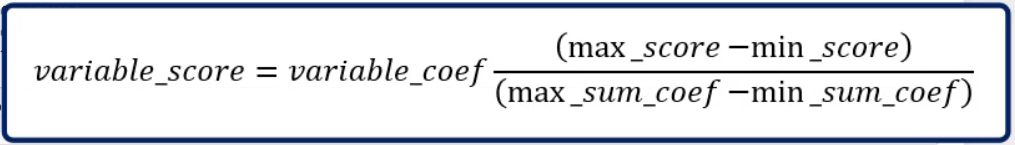

In [75]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficient']*(max_score - min_score) / (max_num_coef - min_num_coef)

In [76]:
df_scorecard

,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation
0,0,Intercept,-0.076301,NaN,Intercept,-4.631592
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165
5,5,grade:E,0.364660,1.596924e-49,grade,22.135500
6,6,grade:F,0.177080,1.451349e-13,grade,10.749075
7,7,verification_status:Not Verified,0.224692,1.459044e-264,verification_status,13.639212
8,8,verification_status:Source Verified,0.051464,1.955779e-20,verification_status,3.123936
9,9,purpose:debt_consolidation,0.132326,6.896750e-26,purpose,8.032396


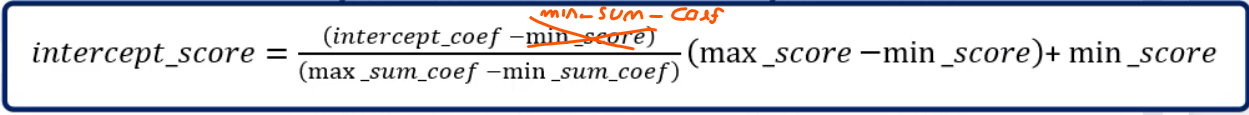

In [77]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficient'][0] - min_num_coef) / (max_num_coef - min_num_coef)*(max_score - min_score) + min_score)
df_scorecard.head(5)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_12728\3675052422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficient'][0] - min_num_coef) / (max_num_coef - min_num_coef)*(max_score - min_score) + min_score)


,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation
0,0,Intercept,-0.076301,NaN,Intercept,369.882169
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165


In [78]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.076301,NaN,Intercept,369.882169,370.0
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028,98.0
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034,71.0
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798,53.0
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165,38.0


Check if the rounding create any avalued over or under min_score and max_score

In [79]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [80]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [81]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.head()

,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-0.076301,NaN,Intercept,369.882169,370.0,370.0
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028,98.0,98.0
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034,71.0,71.0
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798,53.0,53.0
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165,38.0,38.0


# Calculating Credit Score

In [82]:
inputs_test.head(2)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_date:<40,mths_since_issue_date:40-43,mths_since_issue_date:44-45,mths_since_issue_date:46-48,mths_since_issue_date:47-51,mths_since_issue_date:52-55,mths_since_issue_date:55-59,mths_since_issue_date:60-65,mths_since_issue_date:66-76,mths_since_issue_date:77-96,mths_since_issue_date:97-113,mths_since_issue_date:114-135,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.068,int_rate:15.068-22.772,mths_since_earliest_cr_line:<22,mths_since_earliest_cr_line:22-41,mths_since_earliest_cr_line:42-62,mths_since_earliest_cr_line:63-144,mths_since_earliest_cr_line:145-310,mths_since_earliest_cr_line:311-537,annual_inc:<=5k,annual_inc:5k-10k,annual_inc:10k-30k,annual_inc:30k-45k,annual_inc:45k-65k,annual_inc:65k-85k,annual_inc:85k-100k,annual_inc:100k-125k,annual_inc:125k-160k,annual_inc:160k-185k,annual_inc:>200k,mths_since_last_delinq:0-4,mths_since_last_delinq:5-19,mths_since_last_delinq:20-85,mths_since_last_delinq:>86,inq_last_6mths:<=1.32,inq_last_6mths:1.32-3.3,inq_last_6mths:3.3-5.28,open_acc:<=6,open_acc:6-8,open_acc:8-32,total_rev_hi_lim:<=50k,total_rev_hi_lim:50k-200k,acc_now_delinq:<=0.07
1758049,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
686533,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


In [83]:
df_scorecard

,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-0.076301,NaN,Intercept,369.882169,370.0,370.0
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028,98.0,98.0
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034,71.0,71.0
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798,53.0,53.0
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165,38.0,38.0
5,5,grade:E,0.364660,1.596924e-49,grade,22.135500,22.0,22.0
6,6,grade:F,0.177080,1.451349e-13,grade,10.749075,11.0,11.0
7,7,verification_status:Not Verified,0.224692,1.459044e-264,verification_status,13.639212,14.0,14.0
8,8,verification_status:Source Verified,0.051464,1.955779e-20,verification_status,3.123936,3.0,3.0
9,9,purpose:debt_consolidation,0.132326,6.896750e-26,purpose,8.032396,8.0,8.0


In [84]:
# Calculating the credit score for index = 1758049
370 + 71.0 + 8.0 + 1.0 + 8.0 + 4.0 + 18.0 + 11.0 - 10.0 + 20.0 + 8.0 - 16.0 - 4.0 

489.0

In [85]:
df_scorecard['Original feature name'].unique()

array(['Intercept', 'grade', 'verification_status', 'purpose',
       'initial_list_status', 'term_int', 'emp_length_int',
       'mths_since_issue_date', 'int_rate', 'mths_since_earliest_cr_line',
       'annual_inc', 'mths_since_last_delinq', 'inq_last_6mths',
       'open_acc', 'total_rev_hi_lim', 'acc_now_delinq'], dtype=object)

In [86]:
dummies_for_me = []
for cat in df_scorecard['Original feature name'].unique():
    for dummie in loan_data_inputs_test:
        if cat in dummie:
            dummies_for_me.append(dummy)

In [87]:
dummies_for_me

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'grade:G',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'verification_status:Verified',
 'purpose:educational__small_business__renewable_energy__moving',
 'purpose:debt_consolidation',
 'purpose:medical_wedding_other_house_vacation_major_purchase',
 'purpose:home_improvement',
 'purpose:credit_card',
 'purpose:car',
 'initial_list_status:f',
 'initial_list_status:w',
 'term_int:36',
 'term_int:60',
 'emp_length_int:0',
 'emp_length_int:1',
 'emp_length_int:2-6',
 'emp_length_int:7-9',
 'emp_length_int:10',
 'mths_since_issue_date:<40',
 'mths_since_issue_date:40-43',
 'mths_since_issue_date:44-45',
 'mths_since_issue_date:46-48',
 'mths_since_issue_date:47-51',
 'mths_since_issue_date:52-55',
 'mths_since_issue_date:55-59',
 'mths_since_issue_date:60-65',
 'mths_since_issue_date:66-76',
 'mths_since_issue_date:77-96',
 'mths_since_issue_date:97-113',
 'mths_since_issue_date:114-135

In [88]:
inputs_test_with_ref_cat = loan_data_inputs_test[dummies_for_me]

inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat.copy()
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [89]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educational__small_business__renewable_energy__moving,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_date:<40,mths_since_issue_date:40-43,mths_since_issue_date:44-45,mths_since_issue_date:46-48,mths_since_issue_date:47-51,mths_since_issue_date:52-55,mths_since_issue_date:55-59,mths_since_issue_date:60-65,mths_since_issue_date:66-76,mths_since_issue_date:77-96,mths_since_issue_date:97-113,mths_since_issue_date:114-135,mths_since_issue_date:>136,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.068,int_rate:15.068-22.772,int_rate:>22.772,mths_since_earliest_cr_line:<22,mths_since_earliest_cr_line:22-41,mths_since_earliest_cr_line:42-62,mths_since_earliest_cr_line:63-144,mths_since_earliest_cr_line:145-310,mths_since_earliest_cr_line:311-537,mths_since_earliest_cr_line:>538,annual_inc:<=5k,annual_inc:5k-10k,annual_inc:10k-30k,annual_inc:30k-45k,annual_inc:45k-65k,annual_inc:65k-85k,annual_inc:85k-100k,annual_inc:100k-125k,annual_inc:125k-160k,annual_inc:160k-185k,annual_inc:185k-200k,annual_inc:>200k,mths_since_last_delinq:Missing,mths_since_last_delinq:0-4,mths_since_last_delinq:5-19,mths_since_last_delinq:20-85,mths_since_last_delinq:>86,inq_last_6mths:<=1.32,inq_last_6mths:1.32-3.3,inq_last_6mths:3.3-5.28,inq_last_6mths:>5.28,open_acc:<=6,open_acc:6-8,open_acc:8-32,open_acc:>32,total_rev_hi_lim:<=50k,total_rev_hi_lim:50k-200k,total_rev_hi_lim:>200k,acc_now_delinq:<=0.07,acc_now_delinq:>0.07
1758049,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
686533,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
900721,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1727912,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
539691,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [90]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Features Name'].values]

In [91]:
scorecard_score = df_scorecard['Score - Final']

In [92]:
inputs_test_with_ref_cat_w_intercept.shape

(452134, 81)

In [93]:
scorecard_score.shape

(81,)

In [94]:
scorecard_score = scorecard_score.values.reshape(81, 1)

In [95]:
scorecard_score.shape

(81, 1)

In [96]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_score)

In [97]:
y_scores.head()

,0
1758049,489.0
686533,477.0
900721,554.0
1727912,424.0
539691,548.0


# From credi score to PD

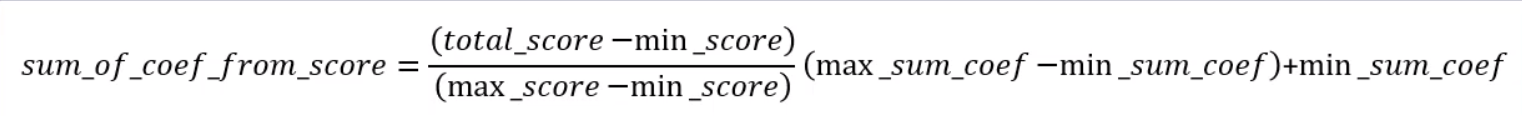

Probability of being good based on a score

In [98]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score))*(max_num_coef - min_num_coef) + min_num_coef

In [99]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
1758049,0.868304
686533,0.844008
900721,0.950586
1727912,0.693224
539691,0.945731


In [100]:
y_hat_test_proba[0:5]

array([0.87156215, 0.84730404, 0.95236192, 0.69806141, 0.94637082])

Setting Cut-offs

In [101]:
tr = 0.7
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [102]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,10955,46110
1,19833,375236


In [103]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.024230,0.101983
1,0.043865,0.829922


In [104]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,10955,46110
1,19833,375236


In [105]:
print(metrics.classification_report(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test']))

              precision    recall  f1-score   support

           0       0.36      0.19      0.25     57065
           1       0.89      0.95      0.92    395069

    accuracy                           0.85    452134
   macro avg       0.62      0.57      0.58    452134
weighted avg       0.82      0.85      0.83    452134



In [106]:
metrics.roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99998248, 0.99998248,
        1.        ]),
 array([0.00000000e+00, 2.53120341e-06, 8.35297125e-05, ...,
        9.99997469e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99936682, 0.99925136, ..., 0.40883801, 0.39052576,
        0.37761349]))

In [107]:
# fpr = false positive rate
# tpr = true positive rate 
fpr, tpr, threshold = metrics.roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

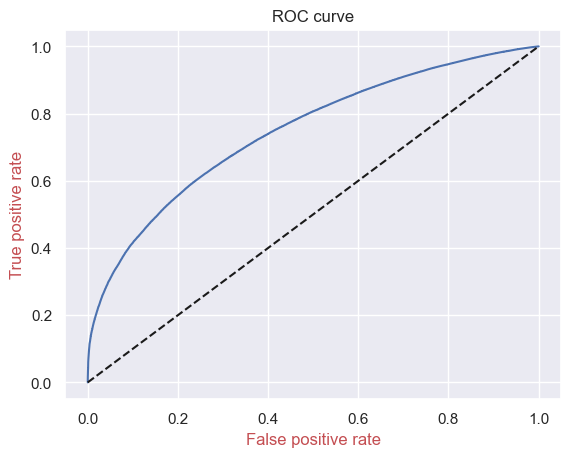

In [108]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate', color = 'r')
plt.ylabel('True positive rate', color = 'r')
plt.title('ROC curve')

In [109]:
threshold

array([       inf, 0.99936682, 0.99925136, ..., 0.40883801, 0.39052576,
       0.37761349])

In [110]:
df_cutoffs = pd.concat([pd.DataFrame(threshold), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['threshold', 'fpr', 'tpr']
df_cutoffs.head()

,threshold,fpr,tpr
0,inf,0.0,0.000000
1,0.999367,0.0,0.000003
2,0.999251,0.0,0.000084
3,0.999251,0.0,0.000091
4,0.999228,0.0,0.000119


In [111]:
df_cutoffs['threshold'][0] = 1 - 1 / np.power(10, 16)

Calculate a score based from probability to be good.

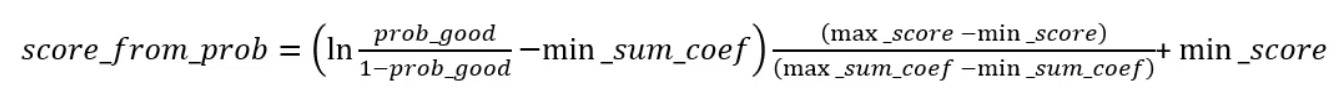

In [112]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['threshold'] / (1-df_cutoffs['threshold'])) - min_num_coef) * ((max_score - min_score) / (max_num_coef - min_num_coef)) + min_score).round()

In [113]:
df_cutoffs.head()

,threshold,fpr,tpr,Score
0,1.000000,0.0,0.000000,1671.0
1,0.999367,0.0,0.000003,822.0
2,0.999251,0.0,0.000084,811.0
3,0.999251,0.0,0.000091,811.0
4,0.999228,0.0,0.000119,809.0


In [114]:
df_cutoffs['Score'][0] = max_score

In [115]:
df_cutoffs.head()

,threshold,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.999367,0.0,0.000003,822.0
2,0.999251,0.0,0.000084,811.0
3,0.999251,0.0,0.000091,811.0
4,0.999228,0.0,0.000119,809.0


In [116]:
df_cutoffs.tail()

,threshold,fpr,tpr,Score
146633,0.409296,0.999965,0.999995,352.0
146634,0.409254,0.999965,0.999997,352.0
146635,0.408838,0.999982,0.999997,352.0
146636,0.390526,0.999982,1.000000,347.0
146637,0.377613,1.000000,1.000000,344.0


In [117]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [118]:
df_cutoffs['N Approved'] = df_cutoffs['threshold'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [119]:
df_cutoffs.head()

,threshold,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,452134,0.000000,1.000000
1,0.999367,0.0,0.000003,822.0,1,452133,0.000002,0.999998
2,0.999251,0.0,0.000084,811.0,33,452101,0.000073,0.999927
3,0.999251,0.0,0.000091,811.0,36,452098,0.000080,0.999920
4,0.999228,0.0,0.000119,809.0,47,452087,0.000104,0.999896


In [120]:
df_cutoffs.tail()

,threshold,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
146633,0.409296,0.999965,0.999995,352.0,452130,4,0.999991,0.000009
146634,0.409254,0.999965,0.999997,352.0,452131,3,0.999993,0.000007
146635,0.408838,0.999982,0.999997,352.0,452132,2,0.999996,0.000004
146636,0.390526,0.999982,1.000000,347.0,452133,1,0.999998,0.000002
146637,0.377613,1.000000,1.000000,344.0,452134,0,1.000000,0.000000


In [121]:
df_cutoffs.shape

(146638, 8)

In [122]:
# let't assume the highest level of probability we'd accept is 10% this mean tha the aprovel rate is 90% = threshold = 0.9
df_cutoffs.iloc[df_cutoffs[df_cutoffs['threshold'] <= 0.9].index[0] - 1:, :].head()

,threshold,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
57921,0.900004,0.169789,0.519249,508.0,214828,237306,0.475142,0.524858
57922,0.899998,0.169789,0.519254,508.0,214830,237304,0.475147,0.524853
57923,0.899996,0.169789,0.519264,508.0,214834,237300,0.475156,0.524844
57924,0.899996,0.169806,0.519264,508.0,214835,237299,0.475158,0.524842
57925,0.899994,0.169806,0.519266,508.0,214836,237298,0.475160,0.524840


In [123]:
# let't assume the highest level of probability we'd accept is 5%
df_cutoffs.iloc[df_cutoffs[df_cutoffs['threshold'] <= 0.95].index[0] - 1:, :].head()

,threshold,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
30254,0.950002,0.045755,0.299325,553.0,120865,331269,0.267321,0.732679
30255,0.949997,0.045755,0.299345,553.0,120873,331261,0.267339,0.732661
30256,0.949997,0.045755,0.299350,553.0,120875,331259,0.267343,0.732657
30257,0.949994,0.045755,0.299363,553.0,120880,331254,0.267354,0.732646
30258,0.949993,0.045755,0.299373,553.0,120884,331250,0.267363,0.732637


Export the data

In [124]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educational__small_business__renewable_energy__moving,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_date:<40,mths_since_issue_date:40-43,mths_since_issue_date:44-45,mths_since_issue_date:46-48,mths_since_issue_date:47-51,mths_since_issue_date:52-55,mths_since_issue_date:55-59,mths_since_issue_date:60-65,mths_since_issue_date:66-76,mths_since_issue_date:77-96,mths_since_issue_date:97-113,mths_since_issue_date:114-135,mths_since_issue_date:>136,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.068,int_rate:15.068-22.772,int_rate:>22.772,mths_since_earliest_cr_line:<22,mths_since_earliest_cr_line:22-41,mths_since_earliest_cr_line:42-62,mths_since_earliest_cr_line:63-144,mths_since_earliest_cr_line:145-310,mths_since_earliest_cr_line:311-537,mths_since_earliest_cr_line:>538,annual_inc:<=5k,annual_inc:5k-10k,annual_inc:10k-30k,annual_inc:30k-45k,annual_inc:45k-65k,annual_inc:65k-85k,annual_inc:85k-100k,annual_inc:100k-125k,annual_inc:125k-160k,annual_inc:160k-185k,annual_inc:185k-200k,annual_inc:>200k,mths_since_last_delinq:Missing,mths_since_last_delinq:0-4,mths_since_last_delinq:5-19,mths_since_last_delinq:20-85,mths_since_last_delinq:>86,inq_last_6mths:<=1.32,inq_last_6mths:1.32-3.3,inq_last_6mths:3.3-5.28,inq_last_6mths:>5.28,open_acc:<=6,open_acc:6-8,open_acc:8-32,open_acc:>32,total_rev_hi_lim:<=50k,total_rev_hi_lim:50k-200k,total_rev_hi_lim:>200k,acc_now_delinq:<=0.07,acc_now_delinq:>0.07
1758049,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
686533,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
900721,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1727912,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
539691,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [125]:
df_scorecard.head(10)

,index,Features Name,Coefficient,P-values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-0.076301,NaN,Intercept,369.882169,370.0,370.0
1,1,grade:A,1.613924,0.000000e+00,grade,97.968028,98.0,98.0
2,2,grade:B,1.174069,0.000000e+00,grade,71.268034,71.0,71.0
3,3,grade:C,0.871421,4.717304e-218,grade,52.896798,53.0,53.0
4,4,grade:D,0.623807,2.674831e-124,grade,37.866165,38.0,38.0
5,5,grade:E,0.364660,1.596924e-49,grade,22.135500,22.0,22.0
6,6,grade:F,0.177080,1.451349e-13,grade,10.749075,11.0,11.0
7,7,verification_status:Not Verified,0.224692,1.459044e-264,verification_status,13.639212,14.0,14.0
8,8,verification_status:Source Verified,0.051464,1.955779e-20,verification_status,3.123936,3.0,3.0
9,9,purpose:debt_consolidation,0.132326,6.896750e-26,purpose,8.032396,8.0,8.0


In [126]:
dummies_for_me = []
for cat in df_scorecard['Original feature name'].unique():
    for dummie in loan_data_inputs_train:
        if cat in dummie:
            dummies_for_me.append(dummy)

inputs_train_with_ref_cat = loan_data_inputs_train[dummies_for_me]

In [130]:
# inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [131]:
# df_scorecard.to_csv('df_scorecard.csv')

In [ ]:
# pickle.dump(reg, open('pd_model.sav', 'wb'))